In [72]:
from IPython import get_ipython
from matplotlib import pyplot as plt
import numpy as np
import pickle
import caiman as cm

from caiman.base.rois import register_multisession
from caiman.utils import visualization
from caiman.utils.utils import download_demo

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

from scipy.io import loadmat
from tifffile import imread
import h5py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
import glob
from os import path
def get_h5_and_movie(startDirs,caiman_pat = 'ConcatenatedMovie_MC_caimanEval_Python.hdf5',
                     movie_pat = 'ConcatenatedMovie_MC.tif'):
    cm_files = []
    movie_files = []
    for startDir in startDirs:
        # for root,_,files in os.walk(startDir):
        cm_file = glob.glob(path.join(startDir,'*',caiman_pat))
        movie_file = glob.glob(path.join(startDir,movie_pat))
        # print(cm_file,movie_file)
        if cm_file and movie_file:
            cm_files.append(cm_file[0])
            movie_files.append(movie_file[0])
        else:
            cm_files.append('')
            movie_files.append('')
    return cm_files, movie_files

In [209]:
# This should be some loops to get files needed for the processing.
import os
movieList = []
skippedList = []
# where we start, will search all nodes down stream of the
# startDir
startDir = '/mnt/lily_shared' #'/mnt/lily_shared2'
# what filename we search for if you used the batch script it should be as below.
pat_gui = 'gui_rec'
pat_gui2 = 'norewgui_rec'
pat_track = '1w_rec' 

# get a list of caiman eval files, tif videos, session folders and the root
sess_cms = []
sess_movies = []
sess_folders = []
sess_root = []
for root,dirnames,filenames in os.walk(startDir):
    gui_dirs = [os.path.join(root,d) for d in dirnames if d.startswith(pat_gui)]
    nrgui_dirs = [os.path.join(root,d) for d in dirnames if d.startswith(pat_gui2)]
    track_dirs =[os.path.join(root,d) for d in dirnames if d.startswith(pat_track)]
    if gui_dirs and track_dirs:
        all_dirs = track_dirs + gui_dirs + nrgui_dirs
        cm_files,movie_files = get_h5_and_movie(all_dirs)
        sess_cms.append(cm_files)
        sess_movies.append(movie_files)
        sess_folders.append(all_dirs)
        sess_root.append(root)

/mnt/lily_shared/tdt_285/250415/gui_rec001/caimanOuputs_2025_5_19_23_29


In [216]:
# example main-loop to go over files
from caimanMutiRegFunction import runMutiReg
save_folder = '/mnt/lily_processed_data/multi_sess_reg_24to25'

# main loop
for f, sess in enumerate(sess_root):
    mouseInfo = '_'.join(sess.split('/')[-2:] + ['caiman_multiReg.mat'])
    if (all(sess_cms[f]) and all(sess_movies[f])):
        pass # The number of caiman eval files and number of movies matched, we can do multi-session register
        # multiReg = runMutiReg(sess_cms[f],sess_movies[f],mat_savefolder = save_folder,
        #                       mat_savename = mouseInfo)
    else:
        # some file are missing, we don't want to run multi-session register on this session
        print(sess_cms[f])
        print(sess_movies[f])


# caiman eval file from the past
cm_fileList = ['/mnt/lily_shared/tdt_210/250330/gui_rec001/caimanOuputs_2025_3_31_19_47/ConcatenatedMovie_MC_caimanEval_Python.hdf5',
            '/mnt/lily_shared/tdt_210/250330/1w_rec002/caimanOuputs_2025_3_31_19_30/ConcatenatedMovie_MC_caimanEval_Python.hdf5']
# movie files
movie_list = ['/mnt/lily_shared/tdt_210/250330/gui_rec001/ConcatenatedMovie_MC.tif',
            '/mnt/lily_shared/tdt_210/250330/1w_rec002/ConcatenatedMovie_MC.tif']

multiReg = runMutiReg(cm_fileList,movie_list)

['', '/mnt/lily_shared/a2a_260/250408/gui_rec001/caimanOuputs_2025_4_14_11_42/ConcatenatedMovie_MC_caimanEval_Python.hdf5']
['', '/mnt/lily_shared/a2a_260/250408/gui_rec001/ConcatenatedMovie_MC.tif']
['', '']
['', '']
['', '']
['', '']
['/mnt/lily_shared/tdt_011/250127/1w_rec001/caimanOuputs_2025_3_31_15_0/ConcatenatedMovie_MC_caimanEval_Python.hdf5', '/mnt/lily_shared/tdt_011/250127/gui_rec003/caimanOuputs_2025_3_31_15_12/ConcatenatedMovie_MC_caimanEval_Python.hdf5', '']
['/mnt/lily_shared/tdt_011/250127/1w_rec001/ConcatenatedMovie_MC.tif', '/mnt/lily_shared/tdt_011/250127/gui_rec003/ConcatenatedMovie_MC.tif', '']
['', '', '', '']
['', '', '', '']
['', '/mnt/lily_shared/tdt_284/250415/gui_rec001/caimanOuputs_2025_5_19_20_57/ConcatenatedMovie_MC_caimanEval_Python.hdf5']
['', '/mnt/lily_shared/tdt_284/250415/gui_rec001/ConcatenatedMovie_MC.tif']


The local backend is an alias for the multiprocessing backend, and the alias may be removed in some future version of Caiman


The local backend is an alias for the multiprocessing backend, and the alias may be removed in some future version of Caiman


Preparing data for /mnt/lily_shared/tdt_210/250330/gui_rec001/ConcatenatedMovie_MC.tif


<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 254 @10> invalid value offset 0')
Your tif file is saved a single pagefile. Performance will be affected


Memory map, mem-map file saved at: /home/howelab/caiman_data/temp/ConcatenatedMovie_MCmmapFile_d1_505_d2_712_d3_1_order_C_frames_26152.mmap
Calculating local correlation...


Please ignore anything below, all cells below are suppose to be testing purpose.

The local backend is an alias for the multiprocessing backend, and the alias may be removed in some future version of Caiman
The local backend is an alias for the multiprocessing backend, and the alias may be removed in some future version of Caiman


Preparing data for /home/howelab/Desktop/testData_caiman_multiReg/gui_rec002/ConcatenatedMovie_MC.tif


<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 254 @10> invalid value offset 0')
Your tif file is saved a single pagefile. Performance will be affected


Memory map, mem-map file saved at: /home/howelab/caiman_data/temp/ConcatenatedMovie_MCmmapFile_d1_502_d2_706_d3_1_order_C_frames_20503.mmap
Calculating local correlation...
Trying to save file:  /home/howelab/Desktop/testData_caiman_multiReg/gui_rec002/caimanOuputs_2025_3_31_13_35/ConcatenatedMovie_MC_caimanEval_Python_addLocalCorr.hdf5
Deleting mem map file at: /home/howelab/caiman_data/temp/ConcatenatedMovie_MCmmapFile_d1_502_d2_706_d3_1_order_C_frames_20503.mmap
Preparing data for /home/howelab/Desktop/testData_caiman_multiReg/1w_rec003/ConcatenatedMovie_MC.tif


<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 254 @10> invalid value offset 0')
Your tif file is saved a single pagefile. Performance will be affected


Memory map, mem-map file saved at: /home/howelab/caiman_data/temp/ConcatenatedMovie_MCmmapFile_d1_488_d2_682_d3_1_order_C_frames_33686.mmap
Calculating local correlation...
Trying to save file:  /home/howelab/Desktop/testData_caiman_multiReg/1w_rec003/caimanOuputs_2025_3_31_13_23/ConcatenatedMovie_MC_caimanEval_Python_addLocalCorr.hdf5
Deleting mem map file at: /home/howelab/caiman_data/temp/ConcatenatedMovie_MCmmapFile_d1_488_d2_682_d3_1_order_C_frames_33686.mmap


/home/howelab/miniforge3/envs/caiman/lib/python3.11/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Saving registeration result to: /home/howelab/Desktop/testData_caiman_multiReg/1w_rec003/../multi_reg.mat


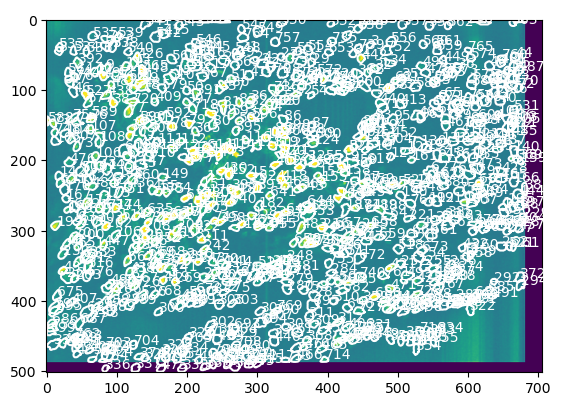

In [197]:
# an example of single session run, please keep it here.
from caimanMutiRegFunction import runMutiReg
# caiman eval file from the past
cm_fileList = ['/home/howelab/Desktop/testData_caiman_multiReg/gui_rec002/caimanOuputs_2025_3_31_13_35/ConcatenatedMovie_MC_caimanEval_Python.hdf5',
               '/home/howelab/Desktop/testData_caiman_multiReg/1w_rec003/caimanOuputs_2025_3_31_13_23/ConcatenatedMovie_MC_caimanEval_Python.hdf5']
# movie files
movie_list = ['/home/howelab/Desktop/testData_caiman_multiReg/gui_rec002/ConcatenatedMovie_MC.tif',
              '/home/howelab/Desktop/testData_caiman_multiReg/1w_rec003/ConcatenatedMovie_MC.tif']

multiReg = runMutiReg(cm_fileList,movie_list)


In [215]:
len(multiReg['mask_info'])
len(multiReg['Assignment'])

772